<h1>Introduction</h1>
<p>In these lab notes we will introduce you to Naïve Bayes and your task is to implement a relatively simple spam filter.  We will use a small data set to train and test the model (available on Blackboard). </p> 

<b>Note:</b>  Use Jupyter Notebook or Google Colab (NOT Jupyter Lab).
    
<p>The messages within the datasets have already been classified as ham (not spam), or spam. </p> 

<p>The implementation of a Naïve Bayes Spam Filter is relatively straight forward using scikit-learn, however, this library hides the implementation details (and many solutions are available on the Internet).  Therefore, this task does not permit the use of the scikit-learn library or similar libraries that perform similar tasks.  We hope that this will help with your understanding of the implementation details.</p> 
<p>Bayes Theorem can give us the probability that a message is spam S for a given event E</p>

<h1>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h1>

<p>Where:</p>
<p>$P\left(S\middle|\ E\right)$, the probability that the message is spam given the event occurred.</p>
<p>$P\left(S\right)$, the prior probability that a message is spam.</p>
<p>$P\left(\lnot S\right)$, the prior probability that a message is not spam.  </p>

Note:  $P\left(S\right)$ and $P\left(\lnot S\right)$ are prior values, or prior beliefs.  This value could be calculated using the number of spam and number of ham classifications in the data set.  You could also use arbitrary values, for example; you could assume that of all email messages sent, 80% of them are spam and 20% of them are not spam.  The success of the filter depends on the prior values.

<p>$P\left(E\middle|\ S\right)$, the probability that event E occurs in a spam emails.</p>

<p>$P\left(E|\lnot S\right)$, the probability that event E occurs in non-spam emails.</p>

<h3>Additional Libraries</h3>
<p>As you progress through the exercises you may need additional libraries that are not installed, for example when visualising the data you may need to import WordCloud.  If you use [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) the necessary libraries will be available, which will save you having to pip install.  </p>
<h3>The Implementation</h3>
<p>We have tried to keep the implementation quite simple and therefore not accounted for things like filtering small often used words, nor does the implementation calculate probabilities of a word in the frequency list not appearing in spam.  We have also filtered things like telephone numbers, which could be used to identify spam.   The final exercise allows you to make recommendations how the model could be improved.    </p>


<h3>1.  Read the dataset into a dataframe and explore</h3>
<p>Start by importing pandas and read the dataset into a DataFrame named df.  Output the first 20 rows of the dataframe to get a general feel of how the data is structured.</p>
<p>You may encounter the error: UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte.  You don't need to edit the datafile.  I was able to successfully read in the datafile by changing the encoding to latin-1.</p>
<p>[1 Mark]</p>

In [3]:
import pandas as pd
import numpy as np
from collections import defaultdict as dic
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import matplotlib.pyplot as plt
import math

df = pd.read_csv("spam.csv", encoding='latin-1')
df.head(20)

v1                                                 v2 Unnamed: 2  \
0    ham  Go until jurong point, crazy.. Available only ...        NaN   
1    ham                      Ok lar... Joking wif u oni...        NaN   
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3    ham  U dun say so early hor... U c already then say...        NaN   
4    ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5   spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6    ham  Even my brother is not like to speak with me. ...        NaN   
7    ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8   spam  WINNER!! As a valued network customer you have...        NaN   
9   spam  Had your mobile 11 months or more? U R entitle...        NaN   
10   ham  I'm gonna be home soon and i don't want to tal...        NaN   
11  spam  SIX chances to win CASH! From 100 to 20,000 po...        NaN   
12  spam  URGENT! You have won a 1 week FREE membership ...        NaN   
13   ham  I've been searching for the right words to tha...        NaN   
14   ham                I HAVE A DATE ON SUNDAY WITH WILL!!        NaN   
15  spam  XXXMobileMovieClub: To use your credit, click ...        NaN   
16   ham                         Oh k...i'm watching here:)        NaN   
17   ham  Eh u remember how 2 spell his name... Yes i di...        NaN   
18   ham  Fine if thatåÕs the way u feel. ThatåÕs the wa...        NaN   
19  spam  England v Macedonia - dont miss the goals/team...        NaN   

   Unnamed: 3 Unnamed: 4  
0         NaN        NaN  
1         NaN        NaN  
2         NaN        NaN  
3         NaN        NaN  
4         NaN        NaN  
5         NaN        NaN  
6         NaN        NaN  
7         NaN        NaN  
8         NaN        NaN  
9         NaN        NaN  
10        NaN        NaN  
11        NaN        NaN  
12        NaN        NaN  
13        NaN        NaN  
14        NaN        NaN  
15        NaN        NaN  
16        NaN        NaN  
17        NaN        NaN  
18        NaN        NaN  
19        NaN        NaN

<h3>2. Clean the data</h3>
<p>We are only interested in words, clean the data so that all punctuations are removed.  You should be left with a dataset that only contains alpha characters (including spaces).  You should also ensure all the words are lowercase.  Store the cleaned data into a DataFrame named clean.</p>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Category</th>
      <th>Message</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>ham</td>
      <td>go until jurong point crazy available only in ...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>ham</td>
      <td>ok lar joking wif u oni</td>
    </tr>
    <tr>
      <th>2</th>
      <td>spam</td>
      <td>free entry in  a wkly comp to win fa cup final...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>ham</td>
      <td>u dun say so early hor u c already then say</td>
    </tr>
    <tr>
      <th>4</th>
      <td>ham</td>
      <td>nah i dont think he goes to usf he lives aroun...</td>
    </tr>
  </tbody>
</table>

[2 Marks]

In [4]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1, inplace=True)
df.rename(columns = {"v1": "Category", "v2": "Message"}, inplace = True)
df["Message"] = df["Message"].str.replace('[^a-zA-Z]', ' ')
df["Message"] = df["Message"].str.replace('_',"")
df["Message"] = df["Message"].str.replace("\d+","")
df["Message"] = df["Message"].str.lower()
clean = df
clean

Category                                            Message
0         ham  go until jurong point  crazy   available only ...
1         ham                      ok lar    joking wif u oni   
2        spam  free entry in   a wkly comp to win fa cup fina...
3         ham  u dun say so early hor    u c already then say   
4         ham  nah i don t think he goes to usf  he lives aro...
...       ...                                                ...
5567     spam  this is the  nd time we have tried   contact u...
5568      ham              will    b going to esplanade fr home 
5569      ham  pity    was in mood for that  so   any other s...
5570      ham  the guy did some bitching but i acted like i d...
5571      ham                         rofl  its true to its name

[5572 rows x 2 columns]

<h3>3. Split the Data</h3>
<p>Split the data into two random samples, one for training the model and the other for testing the model.  Create DataFrames named train_data and test_data.  The train_data DataFrame should contain 75% of the data and the test_data DataFrame the remaining 25%.<p>  

<p>[1 Mark]</p>

In [5]:
msk = np.random.rand(len(df["Message"])) < 0.75
train_data = clean[msk]
test_data = clean[~msk]
train_data

Category                                            Message
0         ham  go until jurong point  crazy   available only ...
1         ham                      ok lar    joking wif u oni   
3         ham  u dun say so early hor    u c already then say   
5        spam  freemsg hey there darling it s been   week s n...
6         ham  even my brother is not like to speak with me  ...
...       ...                                                ...
5567     spam  this is the  nd time we have tried   contact u...
5568      ham              will    b going to esplanade fr home 
5569      ham  pity    was in mood for that  so   any other s...
5570      ham  the guy did some bitching but i acted like i d...
5571      ham                         rofl  its true to its name

[4194 rows x 2 columns]

<h3>4. Create a Word Frequency DataFrame</h3>
<p>Create a new DataFrame named word_freq that contains each word with the number of times it appears in a spam and a ham message.  You should use the train_data not the test_data.</p>
<p>Below is an example of what the DataFrame would look like, <i>note</i> that your values may differ depending on how the data was split.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>#Spam</th>
      <th>#Ham</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>go</td>
      <td>27</td>
      <td>196</td>
    </tr>
    <tr>
      <td>1</td>
      <td>until</td>
      <td>4</td>
      <td>17</td>
    </tr>
    <tr>
      <td>2</td>
      <td>jurong</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>3</td>
      <td>point</td>
      <td>1</td>
      <td>9</td>
    </tr>
    <tr>
      <td>4</td>
      <td>crazy</td>
      <td>4</td>
      <td>8</td>
    </tr>
    <tr>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <td>7253</td>
      <td>salesman</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7254</td>
      <td>pity</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7255</td>
      <td>soany</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7256</td>
      <td>suggestions</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>7257</td>
      <td>bitching</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>[2 Marks]</p>

In [6]:
sentences = []
for word in train_data["Message"]:
    sentences.append(word.split()) 
    
spam = dic(int)
ham = dic(int)
for i in range(len(sentences)):
    if df["Category"][i] == "ham":
        p = sentences[i]
        for x in p:
            ham[x] += 1
    else:
        p = sentences[i]
        for x in p:
            spam[x] += 1
            
word_freq_list = []
for a in spam:
    word_freq_list.append([a,spam[a],ham[a]])

for x in ham:
    if x not in spam:
        word_freq_list.append([a,spam[a],ham[a]])
        
word_freq = pd.DataFrame(word_freq_list,  columns=["Word", "#Spam", "#Ham"])
word_freq

Word  #Spam  #Ham
0         u    131   783
1       dun      5    35
2       say     11    62
3        so     48   313
4     early      6    17
...     ...    ...   ...
6584   nmde      1     0
6585   nmde      1     0
6586   nmde      1     0
6587   nmde      1     0
6588   nmde      1     0

[6589 rows x 3 columns]

<h3>5. Visualise the Data</h3>
<p>Let's use a Word Cloud library to visualise the most common words contained in spam messages.</p>

[Example of a Word Cloud Image](https://drive.google.com/open?id=1lVRGHtMB1AMJf-JSi7MmcHbZB_BvBhGC)

<p>[3 Marks]</p>



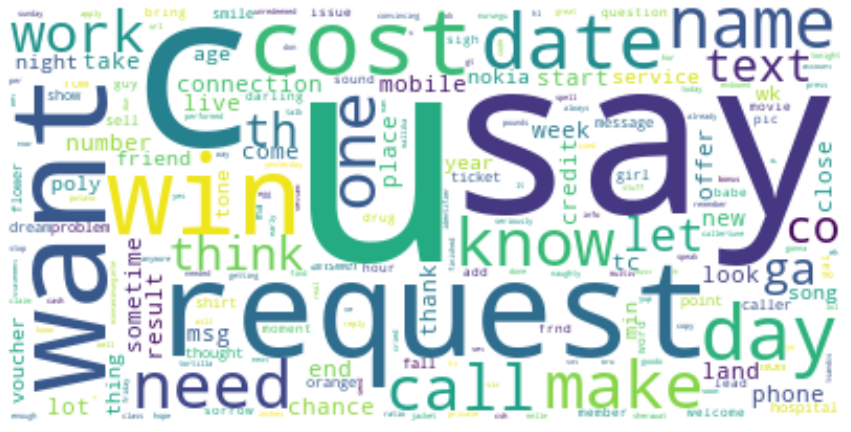

In [7]:
spam_clean = []
for words in spam:
    words = [x.strip(string.punctuation) for x in words]
    spam_clean.append(words)

spam_clean[0]
text_spam = ["".join(text) for text in spam_clean]
final_spam = " ".join(text_spam)
final_spam[:]

spam_wc = WordCloud(background_color="white").generate(final_spam)
plt.figure(figsize = (15,15))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<h3>6.  Calculate $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$</h3>
<p>Next create a new DataFrame named word_prob that gives the probability of each word being found in a spam and ham message.</p>
<p>To calculate the probability of a word being spam you divide the number of times the word was found in spam by the total number of spam messages, likewise to calculate the probability of each word being found in a ham message you divide the number of times the word was found in a ham message by the total number of ham messages.</p>
<p>If a word was not found in ham or spam it will cause problems later because the probability calculated will be zero. Therefore, use a pseudocount k and estimate the probability of seeing the word. This is known as smoothing and results in the following formula when k = 0.5, for example.</p>
<p>$P\left(E\middle| S\right)$ = (number of spams containing the word + k) / (total number of spam messages + 2 * k).</p>
<p>Likewise, for $P\left(E|\lnot S\right)$.</p>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Word</th>
      <th>P(E|S)</th>
      <th>P(E|¬S)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>go</td>
      <td>0.053322</td>
      <td>0.050055</td>
    </tr>
    <tr>
      <th>1</th>
      <td>until</td>
      <td>0.011364</td>
      <td>0.004275</td>
    </tr>
    <tr>
      <th>2</th>
      <td>jurong</td>
      <td>0.002622</td>
      <td>0.000138</td>
    </tr>
    <tr>
      <th>3</th>
      <td>point</td>
      <td>0.002622</td>
      <td>0.002344</td>
    </tr>
    <tr>
      <th>4</th>
      <td>crazy</td>
      <td>0.011364</td>
      <td>0.002344</td>
    </tr>
  </tbody>
</table>
</p>[2 Marks]</p>


In [8]:
spam_only = pd.DataFrame(train_data[train_data['Category'] == 'spam']) # only show rows where messages are spam
spam_len = len(spam_only)
ham_only = pd.DataFrame(train_data[train_data['Category'] == 'ham']) # only show rows where messages are spam
ham_len = len(ham_only)

spam_count = word_freq["#Spam"].values.tolist()
ham_count = word_freq["#Ham"].values.tolist()

word_prob1 = []
for i in range(len(word_freq)):
    if spam_count[i] == 0:
        P_ES = ((spam_count[i] + 0.5) / (spam_len + 2 * 0.5)) # 0.5 is a modified laplace estimator
    else:
        P_ES = ((spam_count[i]) / spam_len) 
    if ham_count[i] == 0:
        P_EnotS = ((ham_count[i] + 0.5) / (ham_len + 2 * 0.5)) # 0.5 is a modified laplace estimator
    else:
        P_EnotS = ((ham_count[i]) / ham_len)
    word_prob1.append([word_freq["Word"][i],P_ES,P_EnotS])

word_prob = pd.DataFrame(word_prob1, columns=["Word", "P(E|S)", "P(E|¬S)"])
word_prob

Word    P(E|S)   P(E|¬S)
0         u  0.233512  0.215524
1       dun  0.008913  0.009634
2       say  0.019608  0.017066
3        so  0.085561  0.086155
4     early  0.010695  0.004679
...     ...       ...       ...
6584   nmde  0.001783  0.000138
6585   nmde  0.001783  0.000138
6586   nmde  0.001783  0.000138
6587   nmde  0.001783  0.000138
6588   nmde  0.001783  0.000138

[6589 rows x 3 columns]

<h3>7. Checking the 'spamliness' of a single word</h3>
<p>Now that we have trained the model, we will test the model.  Before we use the test_data, first let’s check how the model calculates the spamliness of a single word.  This is where we use the Bayes Theorem formula.  We have already calculated $P\left(E\middle| S\right)$ and $P\left(E|\lnot S\right)$, so we can just extract these values from the word_prob DataFrame.</p>
<p>We need to decide on the prior values $P\left(S\right)$ and $P\left(\lnot S\right)$, this is where you can experiment and tweak the model, in this example the prior value for spam was set to $0.4$ and the prior value for not spam or ham was set to $0.6$.</p>
<h3>
$P\left(S\middle|\ E\right)=\frac{P\left(E\middle|\ S\right)P\left(S\right)}{P\left(E\middle|\ S\right)P\left(S\right)+P\left(E|\lnot S\right)P\left(\lnot S\right)}$
</h3>
<pre>
Output
Word = ['free']
P(E|S) = [0.29108392]
P(E|¬S) = [0.01365141]
P(S|E) = [0.93427577]
P(¬S|E) = [0.06572423]
</pre>

<p>[2 Marks]</p>

In [9]:
P_ES_list = word_prob["P(E|S)"].values.tolist()
P_EnotS_list = word_prob["P(E|¬S)"].values.tolist()
PSE_PSnotE_list = []
for i in range(len(word_prob)):
    P_SE = (P_ES_list[i] * 0.4) / (P_ES_list[i] * 0.4 + P_EnotS_list[i] * 0.6) 
    P_notSE = (0.6 * P_EnotS_list[i] / 0.4 * P_ES_list[i] + 0.6 * P_EnotS_list[i])
    PSE_PSnotE_list.append([word_prob["Word"][i],P_SE,P_notSE])
PSE_PSnotE = pd.DataFrame(PSE_PSnotE_list, columns=["Word", "P(S|E)", "P(¬S|E)"])
PSE_PSnotE

for i in range(len(word_prob)):
    print("Word = " + "['"+word_prob["Word"][i]+"']")
    print("P(E|S) = " + "[",round(word_prob["P(E|S)"][i], 8),"]")
    print("P(E|¬S) = " + "[",round(word_prob["P(E|¬S)"][i], 8),"]")
    print("P(S|E) = " + "[",round(PSE_PSnotE["P(S|E)"][i], 8),"]")
    print("P(¬S|E) = " + "[",round(PSE_PSnotE["P(¬S|E)"][i], 8),"]")
    print( )

Word = ['u']
P(E|S) = [ 0.23351159 ]
P(E|¬S) = [ 0.21552436 ]
P(S|E) = [ 0.41938285 ]
P(¬S|E) = [ 0.20480577 ]

Word = ['dun']
P(E|S) = [ 0.00891266 ]
P(E|¬S) = [ 0.00963391 ]
P(S|E) = [ 0.3814774 ]
P(¬S|E) = [ 0.00590914 ]

Word = ['say']
P(E|S) = [ 0.01960784 ]
P(E|¬S) = [ 0.01706579 ]
P(S|E) = [ 0.43373926 ]
P(¬S|E) = [ 0.01074141 ]

Word = ['so']
P(E|S) = [ 0.0855615 ]
P(E|¬S) = [ 0.08615469 ]
P(S|E) = [ 0.39834298 ]
P(¬S|E) = [ 0.0627501 ]

Word = ['early']
P(E|S) = [ 0.01069519 ]
P(E|¬S) = [ 0.00467933 ]
P(S|E) = [ 0.60376418 ]
P(¬S|E) = [ 0.00288267 ]

Word = ['hor']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00027525 ]
P(S|E) = [ 0.81193429 ]
P(¬S|E) = [ 0.00016589 ]

Word = ['c']
P(E|S) = [ 0.01782531 ]
P(E|¬S) = [ 0.02394715 ]
P(S|E) = [ 0.33165815 ]
P(¬S|E) = [ 0.01500859 ]

Word = ['already']
P(E|S) = [ 0.01782531 ]
P(E|¬S) = [ 0.01568951 ]
P(S|E) = [ 0.43098386 ]
P(¬S|E) = [ 0.00983321 ]

Word = ['then']
P(E|S) = [ 0.057041 ]
P(E|¬S) = [ 0.04101294 ]
P(S|E) = [ 0.48111339 ]
P(¬

P(E|¬S) = [ 0.00055051 ]
P(S|E) = [ 0.81193429 ]
P(¬S|E) = [ 0.00033325 ]

Word = ['do']
P(E|S) = [ 0.05347594 ]
P(E|¬S) = [ 0.074594 ]
P(S|E) = [ 0.32337744 ]
P(¬S|E) = [ 0.05073988 ]

Word = ['know']
P(E|S) = [ 0.0516934 ]
P(E|¬S) = [ 0.04431599 ]
P(S|E) = [ 0.43745913 ]
P(¬S|E) = [ 0.03002586 ]

Word = ['what']
P(E|S) = [ 0.0516934 ]
P(E|¬S) = [ 0.05229838 ]
P(S|E) = [ 0.39721085 ]
P(¬S|E) = [ 0.03543425 ]

Word = ['mallika']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['sherawat']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['yesterday']
P(E|S) = [ 0.00891266 ]
P(E|¬S) = [ 0.00385356 ]
P(S|E) = [ 0.60659187 ]
P(¬S|E) = [ 0.00236366 ]

Word = ['find']
P(E|S) = [ 0.01604278 ]
P(E|¬S) = [ 0.01431324 ]
P(S|E) = [ 0.42766333 ]
P(¬S|E) = [ 0.00893238 ]

Word = ['out']
P(E|S) = [ 0.04991087 ]
P(E|¬S) = [ 0.04927058 ]
P(S|E) = [ 0.4031028 ]
P(¬S|E) = [ 0.03325105 ]

Wor

P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['co']
P(E|S) = [ 0.00534759 ]
P(E|¬S) = [ 0.01045968 ]
P(S|E) = [ 0.25419815 ]
P(¬S|E) = [ 0.00635971 ]

Word = ['uk']
P(E|S) = [ 0.01069519 ]
P(E|¬S) = [ 0.01403799 ]
P(S|E) = [ 0.33683332 ]
P(¬S|E) = [ 0.008648 ]

Word = ['goodmorning']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00275255 ]
P(S|E) = [ 0.46336331 ]
P(¬S|E) = [ 0.00166625 ]

Word = ['sleeping']
P(E|S) = [ 0.00534759 ]
P(E|¬S) = [ 0.00330306 ]
P(S|E) = [ 0.51907415 ]
P(¬S|E) = [ 0.00200833 ]

Word = ['ga']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00055051 ]
P(S|E) = [ 0.68340858 ]
P(¬S|E) = [ 0.00033178 ]

Word = ['please']
P(E|S) = [ 0.01604278 ]
P(E|¬S) = [ 0.02532342 ]
P(S|E) = [ 0.29693502 ]
P(¬S|E) = [ 0.01580344 ]

Word = ['give']
P(E|S) = [ 0.01782531 ]
P(E|¬S) = [ 0.0176163 ]
P(S|E) = [ 0.40283414 ]
P(¬S|E) = [ 0.0110408 ]

Word = ['us']
P(E|S) = [ 0.00534759 ]
P(E|¬S) = [ 0.01183595 ]
P(S|E) = [ 0.23148237 ]
P(¬S|E) = [ 0.00719651 ]

Word = ['connection']
P(E|S) =

P(S|E) = [ 0.42432737 ]
P(¬S|E) = [ 0.00698249 ]

Word = ['report']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00137627 ]
P(S|E) = [ 0.46336331 ]
P(¬S|E) = [ 0.00082944 ]

Word = ['supervisor']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00055051 ]
P(S|E) = [ 0.68340858 ]
P(¬S|E) = [ 0.00033178 ]

Word = ['calling']
P(E|S) = [ 0.00534759 ]
P(E|¬S) = [ 0.0030278 ]
P(S|E) = [ 0.5407457 ]
P(¬S|E) = [ 0.00184097 ]

Word = ['right']
P(E|S) = [ 0.01604278 ]
P(E|¬S) = [ 0.01624002 ]
P(S|E) = [ 0.39707088 ]
P(¬S|E) = [ 0.01013482 ]

Word = ['hand']
P(E|S) = [ 0.00534759 ]
P(E|¬S) = [ 0.00192678 ]
P(S|E) = [ 0.64915572 ]
P(¬S|E) = [ 0.00117152 ]

Word = ['take']
P(E|S) = [ 0.02317291 ]
P(E|¬S) = [ 0.02587393 ]
P(S|E) = [ 0.37385419 ]
P(¬S|E) = [ 0.01642372 ]

Word = ['post']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00330306 ]
P(S|E) = [ 0.41845197 ]
P(¬S|E) = [ 0.0019995 ]

Word = ['come']
P(E|S) = [ 0.03743316 ]
P(E|¬S) = [ 0.04404074 ]
P(S|E) = [ 0.36169305 ]
P(¬S|E) = [ 0.02889732 ]

Word = ['texts']
P(E|

P(E|S) = [ 0.00534759 ]
P(E|¬S) = [ 0.00137627 ]
P(S|E) = [ 0.72147751 ]
P(¬S|E) = [ 0.0008368 ]

Word = ['locations']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00027525 ]
P(S|E) = [ 0.81193429 ]
P(¬S|E) = [ 0.00016589 ]

Word = ['sent']
P(E|S) = [ 0.01069519 ]
P(E|¬S) = [ 0.01266171 ]
P(S|E) = [ 0.36025584 ]
P(¬S|E) = [ 0.00780016 ]

Word = ['direct']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00137627 ]
P(S|E) = [ 0.6332854 ]
P(¬S|E) = [ 0.00083312 ]

Word = ['ur']
P(E|S) = [ 0.07308378 ]
P(E|¬S) = [ 0.06991467 ]
P(S|E) = [ 0.41068504 ]
P(¬S|E) = [ 0.04961325 ]

Word = ['mob']
P(E|S) = [ 0.00713012 ]
P(E|¬S) = [ 0.00522984 ]
P(S|E) = [ 0.47613899 ]
P(¬S|E) = [ 0.00319384 ]

Word = ['join']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00440407 ]
P(S|E) = [ 0.35050651 ]
P(¬S|E) = [ 0.002666 ]

Word = ['largest']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00027525 ]
P(S|E) = [ 0.81193429 ]
P(¬S|E) = [ 0.00016589 ]

Word = ['network']
P(E|S) = [ 0.00534759 ]
P(E|¬S) = [ 0.00385356 ]
P(S|E) = [ 0.48055556 ]
P

P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['hex']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.94527719 ]
P(¬S|E) = [ 8.329e-05 ]

Word = ['explain']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00082576 ]
P(S|E) = [ 0.59001218 ]
P(¬S|E) = [ 0.00049767 ]

Word = ['sue']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.94527719 ]
P(¬S|E) = [ 8.329e-05 ]

Word = ['old']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00412882 ]
P(S|E) = [ 0.36533675 ]
P(¬S|E) = [ 0.00249937 ]

Word = ['lapdancer']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['sex']
P(E|S) = [ 0.00713012 ]
P(E|¬S) = [ 0.00192678 ]
P(S|E) = [ 0.71156812 ]
P(¬S|E) = [ 0.00117668 ]

Word = ['live']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00880815 ]
P(S|E) = [ 0.21249342 ]
P(¬S|E) = [ 0.00533199 ]

Word = ['bedroom']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00165153 ]
P(S|E) = [ 0.41845197 ]
P(¬S|E) = [ 0.00099533 ]

Word = ['textoperator']
P(E

P(¬S|E) = [ 0.0019995 ]

Word = ['polys']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00082576 ]
P(S|E) = [ 0.742148 ]
P(¬S|E) = [ 0.00049987 ]

Word = ['zed']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00082576 ]
P(S|E) = [ 0.59001218 ]
P(¬S|E) = [ 0.00049767 ]

Word = ['profit']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00055051 ]
P(S|E) = [ 0.68340858 ]
P(¬S|E) = [ 0.00033178 ]

Word = ['pls']
P(E|S) = [ 0.0285205 ]
P(E|¬S) = [ 0.02339664 ]
P(S|E) = [ 0.44832653 ]
P(¬S|E) = [ 0.01503891 ]

Word = ['comprehensive']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['who']
P(E|S) = [ 0.02317291 ]
P(E|¬S) = [ 0.01954308 ]
P(S|E) = [ 0.44149361 ]
P(¬S|E) = [ 0.01240515 ]

Word = ['paying']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00110102 ]
P(S|E) = [ 0.51907415 ]
P(¬S|E) = [ 0.00066355 ]

Word = ['much']
P(E|S) = [ 0.01604278 ]
P(E|¬S) = [ 0.02091935 ]
P(S|E) = [ 0.33829966 ]
P(¬S|E) = [ 0.01305502 ]

Word = ['hai']
P(E|S) = [ 0.00356506 ]
P(E|¬S) =

P(¬S|E) = [ 0.00167361 ]

Word = ['wat']
P(E|S) = [ 0.01960784 ]
P(E|¬S) = [ 0.0176163 ]
P(S|E) = [ 0.42595849 ]
P(¬S|E) = [ 0.0110879 ]

Word = ['sells']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00027525 ]
P(S|E) = [ 0.81193429 ]
P(¬S|E) = [ 0.00016589 ]

Word = ['closes']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['another']
P(E|S) = [ 0.00534759 ]
P(E|¬S) = [ 0.00578035 ]
P(S|E) = [ 0.3814774 ]
P(¬S|E) = [ 0.00351457 ]

Word = ['hospital']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00165153 ]
P(S|E) = [ 0.59001218 ]
P(¬S|E) = [ 0.00099975 ]

Word = ['data']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['analysis']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['starts']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00192678 ]
P(S|E) = [ 0.3814774 ]
P(¬S|E) = [ 0.00116122 ]

Word = ['monday']
P(E|S) = [ 0.00356506 ]
P(E|

P(¬S|E) = [ 0.00049767 ]

Word = ['usual']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00192678 ]
P(S|E) = [ 0.3814774 ]
P(¬S|E) = [ 0.00116122 ]

Word = ['vijay']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00055051 ]
P(S|E) = [ 0.68340858 ]
P(¬S|E) = [ 0.00033178 ]

Word = ['film']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00137627 ]
P(S|E) = [ 0.46336331 ]
P(¬S|E) = [ 0.00082944 ]

Word = ['different']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00165153 ]
P(S|E) = [ 0.59001218 ]
P(¬S|E) = [ 0.00099975 ]

Word = ['girls']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00357831 ]
P(S|E) = [ 0.39911016 ]
P(¬S|E) = [ 0.00216612 ]

Word = ['local']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00110102 ]
P(S|E) = [ 0.51907415 ]
P(¬S|E) = [ 0.00066355 ]

Word = ['virgins']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['fil']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.94527719 ]
P(¬S|E) = [ 8.329e-05 ]

Word = ['sexual']
P(E|S) = [ 0.00178253 ]
P(E|

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00027525 ]
P(S|E) = [ 0.81193429 ]
P(¬S|E) = [ 0.00016589 ]

Word = ['wait']
P(E|S) = [ 0.01069519 ]
P(E|¬S) = [ 0.01045968 ]
P(S|E) = [ 0.40535565 ]
P(¬S|E) = [ 0.00644361 ]

Word = ['bad']
P(E|S) = [ 0.00534759 ]
P(E|¬S) = [ 0.00495458 ]
P(S|E) = [ 0.41845197 ]
P(¬S|E) = [ 0.00301249 ]

Word = ['lar']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00688137 ]
P(S|E) = [ 0.1472609 ]
P(¬S|E) = [ 0.00414722 ]

Word = ['registered']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00137627 ]
P(S|E) = [ 0.46336331 ]
P(¬S|E) = [ 0.00082944 ]

Word = ['sinco']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00027525 ]
P(S|E) = [ 0.81193429 ]
P(¬S|E) = [ 0.00016589 ]

Word = ['payee']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00027525 ]
P(S|E) = [ 0.81193429 ]
P(¬S|E) = [ 0.00016589 ]

Word = ['icicibank']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00027525 ]
P(S|E) = [ 0.81193429 ]
P(¬S|E) = [ 0.00016589 ]

Word = ['enter']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00275255 ]
P(S|E) = [ 0.3015438

P(¬S|E) = [ 0.00167361 ]

Word = ['difficult']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00192678 ]
P(S|E) = [ 0.55227454 ]
P(¬S|E) = [ 0.00116637 ]

Word = ['guys']
P(E|S) = [ 0.00713012 ]
P(E|¬S) = [ 0.00688137 ]
P(S|E) = [ 0.40855227 ]
P(¬S|E) = [ 0.00420242 ]

Word = ['while']
P(E|S) = [ 0.00534759 ]
P(E|¬S) = [ 0.00495458 ]
P(S|E) = [ 0.41845197 ]
P(¬S|E) = [ 0.00301249 ]

Word = ['second']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00357831 ]
P(S|E) = [ 0.39911016 ]
P(¬S|E) = [ 0.00216612 ]

Word = ['batch']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['gas']
P(E|S) = [ 0.00534759 ]
P(E|¬S) = [ 0.00192678 ]
P(S|E) = [ 0.64915572 ]
P(¬S|E) = [ 0.00117152 ]

Word = ['oz']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00055051 ]
P(S|E) = [ 0.81193429 ]
P(¬S|E) = [ 0.00033325 ]

Word = ['guy']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00660611 ]
P(S|E) = [ 0.15246129 ]
P(¬S|E) = [ 0.00398133 ]

Word = ['kinda']
P(E|S) = [ 0.00178253 ]
P(E|¬S) =

P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['lookin']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00082576 ]
P(S|E) = [ 0.59001218 ]
P(¬S|E) = [ 0.00049767 ]

Word = ['silently']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['said']
P(E|S) = [ 0.00891266 ]
P(E|¬S) = [ 0.01679053 ]
P(S|E) = [ 0.26138007 ]
P(¬S|E) = [ 0.01029879 ]

Word = ['intha']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['ponnungale']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['ipaditan']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['drug']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00082576 ]
P(S|E) = [ 0.59001218 ]
P(¬S|E) = [ 0.00049767 ]

Word = ['able']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00412882 ]
P(S|E) = [ 0.22349359 ]
P(¬S|E) = [ 0.00248

P(E|¬S) = [ 0.00495458 ]
P(S|E) = [ 0.32418686 ]
P(¬S|E) = [ 0.00299924 ]

Word = ['batt']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['byatch']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['whassup']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['almost']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00165153 ]
P(S|E) = [ 0.59001218 ]
P(¬S|E) = [ 0.00099975 ]

Word = ['rightio']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['arent']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00027525 ]
P(S|E) = [ 0.81193429 ]
P(¬S|E) = [ 0.00016589 ]

Word = ['onum']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['ela']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00027525 ]
P(S|E) = [ 0.81193429 ]
P(¬S|E) = [ 0.00016589 ]



Word = ['interflora']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.94527719 ]
P(¬S|E) = [ 8.329e-05 ]

Word = ['flowers']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['christmas']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00330306 ]
P(S|E) = [ 0.26458379 ]
P(¬S|E) = [ 0.00199066 ]

Word = ['midnight']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00110102 ]
P(S|E) = [ 0.68340858 ]
P(¬S|E) = [ 0.0006665 ]

Word = ['miiiiiiissssssssss']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['crave']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00192678 ]
P(S|E) = [ 0.3814774 ]
P(¬S|E) = [ 0.00116122 ]

Word = ['geeee']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00055051 ]
P(S|E) = [ 0.68340858 ]
P(¬S|E) = [ 0.00033178 ]

Word = ['without']
P(E|S) = [ 0.01069519 ]
P(E|¬S) = [ 0.00522984 ]
P(S|E) = [ 0.57687269 ]
P(¬S|E) = [ 0.0032218 ]

Word = ['sound']
P(E|S) = [ 0.00356506 ]
P(E|¬S) 

P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['pie']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00082576 ]
P(S|E) = [ 0.59001218 ]
P(¬S|E) = [ 0.00049767 ]

Word = ['poking']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['everyday']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00027525 ]
P(S|E) = [ 0.81193429 ]
P(¬S|E) = [ 0.00016589 ]

Word = ['teach']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00082576 ]
P(S|E) = [ 0.59001218 ]
P(¬S|E) = [ 0.00049767 ]

Word = ['canada']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00027525 ]
P(S|E) = [ 0.81193429 ]
P(¬S|E) = [ 0.00016589 ]

Word = ['abi']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00055051 ]
P(S|E) = [ 0.68340858 ]
P(¬S|E) = [ 0.00033178 ]

Word = ['snow']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.0030278 ]
P(S|E) = [ 0.28185733 ]
P(¬S|E) = [ 0.00182478 ]

Word = ['windy']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

W

P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['father']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00275255 ]
P(S|E) = [ 0.46336331 ]
P(¬S|E) = [ 0.00166625 ]

Word = ['john']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00247729 ]
P(S|E) = [ 0.48963914 ]
P(¬S|E) = [ 0.00149962 ]

Word = ['ths']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00027525 ]
P(S|E) = [ 0.89620722 ]
P(¬S|E) = [ 0.00016662 ]

Word = ['hav']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00467933 ]
P(S|E) = [ 0.20252529 ]
P(¬S|E) = [ 0.00282011 ]

Word = ['iq']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00082576 ]
P(S|E) = [ 0.59001218 ]
P(¬S|E) = [ 0.00049767 ]

Word = ['tis']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00082576 ]
P(S|E) = [ 0.59001218 ]
P(¬S|E) = [ 0.00049767 ]

Word = ['ias']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00027525 ]
P(S|E) = [ 0.81193429 ]
P(¬S|E) = [ 0.00016589 ]

Word = ['question']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00412882 ]
P(S|E) = [ 0.22349359 ]
P(¬S|E) = [ 0.00248833 ]

Word = ['damn']
P(E|S) = [ 0.00

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['single']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00110102 ]
P(S|E) = [ 0.68340858 ]
P(¬S|E) = [ 0.0006665 ]

Word = ['answers']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00082576 ]
P(S|E) = [ 0.59001218 ]
P(¬S|E) = [ 0.00049767 ]

Word = ['fighting']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00055051 ]
P(S|E) = [ 0.68340858 ]
P(¬S|E) = [ 0.00033178 ]

Word = ['plus']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00412882 ]
P(S|E) = [ 0.22349359 ]
P(¬S|E) = [ 0.00248833 ]

Word = ['broke']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00055051 ]
P(S|E) = [ 0.68340858 ]
P(¬S|E) = [ 0.00033178 ]

Word = ['mmmmmm']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['ahmad']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00055051 ]
P(S|E) = [ 0.68340858 ]
P(¬S|E) = [ 0.00033178 ]

Word = ['begin']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00055051 ]
P(S|E) = [ 0.6834085

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00082576 ]
P(S|E) = [ 0.59001218 ]
P(¬S|E) = [ 0.00049767 ]

Word = ['services']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00220204 ]
P(S|E) = [ 0.51907415 ]
P(¬S|E) = [ 0.001333 ]

Word = ['inclusive']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00082576 ]
P(S|E) = [ 0.59001218 ]
P(¬S|E) = [ 0.00049767 ]

Word = ['credits']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00137627 ]
P(S|E) = [ 0.46336331 ]
P(¬S|E) = [ 0.00082944 ]

Word = ['goto']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00165153 ]
P(S|E) = [ 0.41845197 ]
P(¬S|E) = [ 0.00099533 ]

Word = ['comuk']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00137627 ]
P(S|E) = [ 0.6332854 ]
P(¬S|E) = [ 0.00083312 ]

Word = ['net']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00385356 ]
P(S|E) = [ 0.23569482 ]
P(¬S|E) = [ 0.00232244 ]

Word = ['login']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00137627 ]
P(S|E) = [ 0.46336331 ]
P(¬S|E) = [ 0.00082944 ]

Word = ['qxj']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00055051 ]
P(S|E) = [ 0.68340858 

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['spile']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['seven']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['broad']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['canal']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['mobiles']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00192678 ]
P(S|E) = [ 0.55227454 ]
P(¬S|E) = [ 0.00116637 ]

Word = ['biz']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00137627 ]
P(S|E) = [ 0.46336331 ]
P(¬S|E) = [ 0.00082944 ]

Word = ['mayb']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00247729 ]
P(S|E) = [ 0.32418686 ]
P(¬S|E) = [ 0.001493 ]

Word = ['shoppin']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|


Word = ['wif']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00385356 ]
P(S|E) = [ 0.23569482 ]
P(¬S|E) = [ 0.00232244 ]

Word = ['santa']
P(E|S) = [ 0.00356506 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.94527719 ]
P(¬S|E) = [ 8.329e-05 ]

Word = ['ones']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00165153 ]
P(S|E) = [ 0.41845197 ]
P(¬S|E) = [ 0.00099533 ]

Word = ['repair']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00027525 ]
P(S|E) = [ 0.81193429 ]
P(¬S|E) = [ 0.00016589 ]

Word = ['worries']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00220204 ]
P(S|E) = [ 0.35050651 ]
P(¬S|E) = [ 0.00132711 ]

Word = ['except']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00110102 ]
P(S|E) = [ 0.51907415 ]
P(¬S|E) = [ 0.00066355 ]

Word = ['theres']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00027525 ]
P(S|E) = [ 0.81193429 ]
P(¬S|E) = [ 0.00016589 ]

Word = ['chick']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['huge']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00027525 ]
P(S|E)

P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 

P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]

P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 

P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 

P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 

P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 

P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.2

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.2

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.2

P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde'

P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde'

P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.2

P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.2

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.2

P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde'

P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]

P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 

P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde'

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.2

P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde'

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.2

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.2

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.2

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.2

P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 

P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]

P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde'

P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.2

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.2

P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]

P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 

P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 


Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 

P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]

P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]

P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.292e-05 ]

Word = ['nmde']
P(E|S) = [ 0.00178253 ]
P(E|¬S) = [ 0.00013759 ]
P(S|E) = [ 0.89623281 ]
P(¬S|E) = [ 8.2

<h3>8. Checking the 'spamliness' of several words</h3>
<p>To check the spamliness of several words contained in a message we multiply the probabilities.  The model assumes the words appear as independent events hence the naïve Bayes.  In reality of course, words are not independent events, but the model still performs well.  So we use the assumption that the words appear independently, and hence we multiply probabilities, so
$P(S\,|\, x_1,\dots,x_n)\approx \frac{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)}{P(S)\underset{i=1}{\overset{n}{\prod}}P(x_i | S)+P(\neg S)\underset{i=1}{\overset{n}{\prod}}P(x_i | \neg S)}$

Calculate the probability for each word in a message being spam, you might want to store the calculations in a list named prob_spam.  Likewise create a list for each word not being spam.
Then multiply the probabilities and compare the results.  If the result of multiplying the probabilities for spam is greater than the result of multiplying the probabilities for not spam, then you assume the message as spam.
</p>
<p>If you have a word in your message that is not in the word_prob DataFrame then you can't get the probability.  Skip any words in the message that are not in the word_prob DataFrame.</p>
<p>[2 Marks]</p>

In [ ]:
word_prob2 = word_prob["Word"].values.tolist()
emails = train_data["Message"].values.tolist()

for x in range(len(emails)):
    prob_spam = []
    not_spam = []
    email = emails[x].split()
    for i in range(len(email)):
        if email[i] in word_prob2:
            prob_spam.append(word_prob.iloc[i]['P(E|S)'])
            not_spam.append(word_prob.iloc[i]["P(E|¬S)"])
        else:
            continue
            
    if  np.prod(prob_spam) > np.prod(not_spam):
        print("Message ",x,":")
        print(emails[x])
        print( )
        print("spam probability: ", prob_spam)
        print( )
        print("ham probability: ",not_spam)
        print( )
        print(np.prod(prob_spam))
        print(np.prod(not_spam))
        print( )
        print("Message is spam")
        print( )
        print( )
    else:
        print("Message ",x,":")
        print(emails[x])
        print( )
        print("spam probability: ", prob_spam)
        print( )
        print("ham probability: ",not_spam)
        print( )
        print(np.prod(prob_spam))
        print(np.prod(not_spam))
        print( )
        print("Message is ham")
        print( )
        print( )

Message  0 :
go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat    until 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.023172905525846704, 0.0071301247771836]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939, 0.03220478943022296, 0.011560693641618497, 0.11863473713184695, 0.0013762730525736307, 0.0005505092210294523, 0.0005505092210294523, 0.0002752546105147261, 0.0002752546105147261, 0.023121387283236993, 0.004128819157720892]

8.482684010289459e-33
1.1535020562675433e-38

Message is spam


Message  1 :
ok lar    joking wif u on

3.2860367790865625e-106

Message is spam


Message  41 :
sms  ac sptv  the new jersey devils and the detroit red wings play ice hockey  correct or incorrect  end  reply end sptv

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0855614973262032, 0.0106951871657754, 0.017825311942959002, 0.0570409982174688, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0196078431372549, 0.023172905525846704, 0.0071301247771836]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.08615469309110928, 0.004679328378750344, 0.01568951279933939, 0.04101293696669419, 0.0013762730525736307, 0.0005505092210294523, 0.0002752546105147261, 0.0002752546105147261, 0.020919350399119185, 0.023121387283236993, 0.004128819157720892]

2.0268078461368384e-24
6.174732594452059e-29

Message is spam


Message  42 :
do you know what mallika sherawat did yesterday  find out now     lt url gt 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.019607

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.0427807486631016, 0.0071301247771836, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0196078431372549]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.03220478943022296, 0.011560693641618497, 0.0005505092210294523, 0.0005505092210294523, 0.0002752546105147261, 0.020919350399119185]

3.279920774084903e-23
3.584811130511302e-27

Message is spam


Message  77 :
watching telugu movie  wat abt u 

spam probability:  [0.23351158645276293, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959]

ham probability:  [0.21552436003303055, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261]

7.468650937671048e-09
4.08149925127925e-10

Message is spam


Message  78 :
i see  when

Message  112 :
k  text me when you re on the way

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939, 0.04101293696669419]

1.2064538118182804e-15
6.059078104051247e-17

Message is spam


Message  113 :
sir  waiting for your mail 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344]

3.7343254688355235e-08
1.4285247379477374e-08

Message is spam


Message  114 :
i know you are  can you pls open the back 

spam probability:  [0.23351158645276293, 0.00

2.079597264898805e-70

Message is spam


Message  148 :
hi   finally i completed the course  

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0106951871657754]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.004679328378750344]

4.3644928917015185e-07
1.6580927709150574e-07

Message is spam


Message  149 :
it will stop on itself  i however suggest she stays with someone that will be able to give ors for every stool 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.0570409982174688, 0.0071301247771836, 0.1354723707664884, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.023172905525846704, 0.0071301247771836]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.00467932

Message  181 :
or ill be a little closer like at the bus stop on the same street

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939, 0.04101293696669419, 0.03220478943022296, 0.011560693641618497, 0.11863473713184695, 0.0013762730525736307, 0.0005505092210294523, 0.0005505092210294523]

4.5179179597577536e-27
1.116237430637998e-30

Message is spam


Message  182 :
new theory  argument wins d situation  but loses the person  so dont argue with ur friends just         kick them  amp  say  i m always correct  

spam probability:

Message  212 :
hmv bonus special     pounds of genuine hmv vouchers to be won  just answer   easy questions  play now  send hmv to       more info www    percent real com

spam probability:  [0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.023172905525846704, 0.0071301247771836, 0.0071301247771836, 0.14795008912655971, 0.0035650623885918, 0.0071301247771836]

ham probability:  [0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.01568951279933939, 0.04101293696669419, 0.03220478943022296, 0.011560693641618497, 0.11863473713184695, 0.0013762730525736307, 0.0005505092210294523, 0.0005505092210294523, 0.0002752546105147261, 0.0002752546105147261, 0.0002752546105147261, 0.023121387283236993, 0.0041288

Message  236 :
shit that is really shocking and scary  cant imagine for a second  def up for night out  do u think there is somewhere i could crash for night  save on taxi 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0017825311942959, 0.017825311942959002, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0196078431372549, 0.023172905525846704, 0.0071301247771836, 0.0071301247771836, 0.14795008912655971, 0.0677361853832442, 0.0035650623885918, 0.39750445632798576, 0.0035650623885918, 0.5008912655971479]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.0002752546105147261, 0.01568951279933939, 0.03220478943022296, 0.011560693641618497, 0.11863473713184695, 0.0005505092210294523, 0.0005505092210294523, 0.0002752546105147261, 0.0002752546105147261, 0.0002752546

Message  260 :
i m reading the text i just sent you  its meant to be a joke  so read it in that light

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0196078431372549, 0.023172905525846704]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939, 0.04101293696669419, 0.03220478943022296, 0.011560693641618497, 0.11863473713184695, 0.0013762730525736307, 0.0005505092210294523, 0.0005505092210294523, 0.0002752546105147261, 0.0002752546105147261, 0.020919350399119185, 0.023121387283236993]

2.609053136574997e-35
4.0906080479193386e-41

Mess


ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174]

1.1865510940914407e-12
9.416211882972102e-14

Message is spam


Message  291 :
i will spoil you in bed as well   

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939]

1.078682812810401e-12
8.656839956925963e-14

Message is spam


Message  292 :
i m going for bath will msg you next   lt   gt   min  

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.007130124

Message  326 :
whatsup there  dont u want to sleep

spam probability:  [0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002]

ham probability:  [0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174]

5.081337128132048e-12
4.3689780039383963e-13

Message is spam


Message  327 :
alright i have a new goal now

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.017825311942959002]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.023947151114781174]

6.656551637852983e-10
3.4209097770837643e-10

Message is spam


Message  328 :
free entry into our       weekly competition just text the word win to       now     t c www txttowin co uk

spam probability:  [0.23351158645276293, 0.0089126559714795

Message  362 :
upgrdcentre orange customer  you may now claim your free camera phone upgrade for your loyalty  call now on                offer ends   th july  t c s apply  opt out available

spam probability:  [0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0196078431372549, 0.023172905525846704, 0.0071301247771836, 0.0071301247771836, 0.14795008912655971, 0.0677361853832442, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.012477718360071301]

ham probability:  [0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939, 0.04101293696669419, 0.03220478943022296, 0.011560693641618497, 0.0013762730525736307

Message  401 :
boltblue tones for    p reply poly  or mono  eg poly     cha cha slide    yeah    slow jamz    toxic    come with me or stop   more tones txt more

spam probability:  [0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.0427807486631016, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0196078431372549, 0.023172905525846704, 0.0071301247771836, 0.0071301247771836, 0.14795008912655971, 0.0677361853832442, 0.0035650623885918, 0.0071301247771836]

ham probability:  [0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.03220478943022296, 0.0005505092210294523, 0.0005505092210294523, 0.0002752546105147261, 0.020919350399119185, 0.023121387283236993, 0.004128819157720892, 0.0016515276630883566, 0.12193779245802368, 0.044866501513900356, 0.0008257638315441783, 0.0019267822736030828]

1.1592112709765418e-34
3.36966

Message  426 :
this girl does not stay in bed  this girl doesn t need recovery time  id rather pass out while having fun then be cooped up in bed

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0196078431372549, 0.023172905525846704, 0.0071301247771836, 0.0071301247771836, 0.14795008912655971, 0.0035650623885918, 0.0071301247771836, 0.39750445632798576]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939, 0.04101293696669419, 0.03220478943022296, 0.011560693641618497, 0.11863473713184695, 0.0005505092210294523, 0.0005505092210294523, 0.0002752546105147261, 0.0209193503991

Message  452 :
so how s scotland  hope you are not over showing your jjc tendencies  take care  live the dream

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0071301247771836, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939, 0.04101293696669419, 0.011560693641618497, 0.0005505092210294523, 0.0005505092210294523, 0.0002752546105147261, 0.0002752546105147261, 0.0002752546105147261]

1.157964170058525e-28
5.138596368492748e-35

Message is spam


Message  453 :
tell them u have a headache and just want to use   hour of sick time 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032

Message  483 :
good words     but words may leave u in dismay many times 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0427807486631016]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939, 0.03220478943022296]

9.048403588637102e-16
4.757799585060376e-17

Message is spam


Message  484 :
make sure alex knows his birthday is over in fifteen minutes as far as you re concerned

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0071301247771836, 0.1354723707664884, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918]

ham probability:  [0.2155243

Message  518 :
have a good evening  ttyl

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344]

3.7343254688355235e-08
1.4285247379477374e-08

Message is spam


Message  519 :
did u receive my msg 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0855614973262032, 0.0106951871657754]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.08615469309110928, 0.004679328378750344]

1.904505989106117e-06
8.370694149942145e-07

Message is spam


Message  520 :
ho ho   big belly laugh  see ya tomo

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.004679328378750344, 0.000

Message  549 :
to review and keep the fantastic nokia n gage game deck with club nokia  go   www cnupdates com newsletter  unsubscribe from alerts reply with the word out

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.017825311942959002, 0.017825311942959002, 0.1354723707664884, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.023172905525846704, 0.0071301247771836, 0.14795008912655971, 0.0677361853832442, 0.0035650623885918, 0.0071301247771836, 0.39750445632798576]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.023947151114781174, 0.01568951279933939, 0.11863473713184695, 0.0013762730525736307, 0.0005505092210294523, 0.0005505092210294523, 0.0002752546105147261, 0.0002752546105147261, 0.023121387283236993, 0.004128819157720892, 0.12193779245802368, 0.044866501513900356, 0.00

Message  577 :
dunno he jus say go lido  same time     

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.017825311942959002, 0.017825311942959002]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.023947151114781174, 0.01568951279933939]

1.186551094091441e-11
5.367240773294098e-12

Message is spam


Message  578 :
i promise to take good care of you  princess  i have to run now  please send pics when you get a chance  ttyl 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0196078431372549, 0.023172

Message  609 :
this is hoping you enjoyed your game yesterday  sorry i ve not been in touch but pls know that you are fondly bein thot off  have a great week  abiola

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0855614973262032, 0.0017825311942959, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0196078431372549, 0.023172905525846704, 0.0071301247771836, 0.0035650623885918, 0.0071301247771836, 0.39750445632798576, 0.0035650623885918, 0.012477718360071301, 0.5008912655971479]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.08615469309110928, 0.0002752546105147261, 0.01568951279933939, 0.04101293696669419, 0.03220478943022296, 0.011560693641618497, 0.11863473713184695, 0.0013762730525736307, 0.0005505092210294523, 0.0005505092210294523, 0.0002752546105147261, 0.0002752546105147

pls send me a comprehensive mail about who i m paying  when and how much 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939, 0.04101293696669419, 0.03220478943022296, 0.011560693641618497, 0.11863473713184695, 0.0013762730525736307, 0.0005505092210294523, 0.0005505092210294523]

4.5179179597577536e-27
1.116237430637998e-30

Message is spam


Message  648 :
urgent  call             from your landline  your complimentary    ibiza holiday or        cash await collection sae t cs po box     sk   wp     ppm     

spam probability

Message is spam


Message  683 :
you unbelievable faglord

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302]

4.08080085374092e-05
3.543441786314355e-05

Message is spam


Message  684 :
wife how she knew the time of murder exactly

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939]

2.115064338843923e-14
1.4773577685918243e-15

Message is spam


Message  685 :
i am great princess  what are you thinking about me    

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.00178253

Message  714 :
k  k are you in college 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344]

3.7343254688355235e-08
1.4285247379477374e-08

Message is spam


Message  715 :
urgent  call             from landline  your complimentary    tenerife holiday or          cash await collection sae t cs box     hp    yf    ppm    

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0196078431372549]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0

Message  739 :
haha awesome  omw back now then

spam probability:  [0.23351158645276293, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959]

ham probability:  [0.21552436003303055, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261]

3.809011978212234e-07
2.3916268999834703e-08

Message is spam


Message  740 :
what is your account number 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344]

3.7343254688355235e-08
1.4285247379477374e-08

Message is spam


Message  741 :
eh u send wrongly lar   

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0106951871657754]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.004679328378750344]

4.3644928917015185e-07
1.6580927709150574e-07

Message is spam


Me

Message  770 :
i just got home babe  are you still awake  

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939]

2.115064338843923e-14
1.4773577685918243e-15

Message is spam


Message  771 :
i dunno they close oredi not       v ma fan   

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939]

1.9775851568190684e-12
3.1572004548788806e-13

Message is spam


Message  772 :
just buy a pi

Message  808 :
i m working technical support   voice process networking field 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.017825311942959002]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.023947151114781174]

7.274154819502532e-07
8.485533592329999e-07

Message is ham


Message  809 :
i might come to kerala for   days so you can be prepared to take a leave once i finalise  dont plan any travel during my visit need to finish urgent works 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.023172905525846704, 0.0071301247771836, 0.0071301247771836, 0.14795008912655971, 0.0035650623885918, 0.0071301247771836, 0.39

Message  834 :
no gifts   you trying to get me to throw myself off a cliff or something 

spam probability:  [0.23351158645276293, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0071301247771836, 0.0035650623885918]

ham probability:  [0.21552436003303055, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939, 0.03220478943022296, 0.011560693641618497, 0.11863473713184695, 0.0005505092210294523, 0.0005505092210294523]

2.4927397883045256e-21
2.0527140649183505e-24

Message is spam


Message  835 :
been up to ne thing interesting  did you have a good birthday  when are u wrking nxt  i started uni today 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.057040

Message  865 :
dont forget you can place as many free requests with  stchoice co uk as you wish  for more information call             

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0196078431372549, 0.023172905525846704]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939, 0.04101293696669419, 0.03220478943022296, 0.011560693641618497, 0.11863473713184695, 0.0013762730525736307, 0.0005505092210294523, 0.0005505092210294523, 0.0002752546105147261, 0.0002752546105147261, 0.0002752546105147261, 0.0209193503991191

Message  899 :
yo  you around  just got my car back

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939]

2.115064338843923e-14
1.4773577685918243e-15

Message is spam


Message  900 :
annoying isn t it 

spam probability:  [0.008912655971479501, 0.0196078431372549, 0.0855614973262032]

ham probability:  [0.009633911368015413, 0.01706578585191302, 0.08615469309110928]

1.4952552746531616e-05
1.4164716208383053e-05

Message is spam


Message  901 :
goodmorning  today i am late for   lt   gt  min 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939, 0.04101293696669419, 0.03220478943022296, 0.011560693641618497, 0.11863473713184695, 0.0013762730525736307, 0.0005505092210294523, 0.0005505092210294523, 0.0002752546105147261]

1.610665939307577e-29
3.0724949921222073e-34

Message is spam


Message  935 :
have got   few things to do  may be in   pub later 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.01782


spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939, 0.04101293696669419, 0.03220478943022296, 0.011560693641618497, 0.11863473713184695]

4.985479576609052e-20
2.6762259621372985e-21

Message is spam


Message  969 :
let me know how to contact you  i ve you settled in a room  lets know you are ok 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0035650623885918, 0.00


Message  1004 :
just sent again  do you scream and moan in bed  princess 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939, 0.04101293696669419, 0.03220478943022296, 0.011560693641618497]

3.6800711085232607e-19
2.2558535778294214e-20

Message is spam


Message  1005 :
i thk    shd be ok he said plus minus      did    leave a line in between paragraphs 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0035650623885918, 0.00

Message  1034 :
shuhui say change   suntec steamboat  u noe where  where r u now 

spam probability:  [0.008912655971479501, 0.0196078431372549, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884]

ham probability:  [0.009633911368015413, 0.01706578585191302, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939, 0.04101293696669419, 0.03220478943022296, 0.011560693641618497, 0.11863473713184695]

2.3330913409208484e-16
3.080093867745808e-17

Message is spam


Message  1035 :
what does the dance river do 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0017825311942959]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.0002752546105147261]

7.274154819502532e-08
9.75348688773563e-09

Message is spam


Message  1036 :
yetunde  i m sorry but moji and i seem too busy to be able to go shopping  can you just please f

Message  1057 :
haha just kidding  papa needs drugs

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0106951871657754, 0.0017825311942959]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.004679328378750344, 0.0002752546105147261]

3.967720810637744e-08
2.6743431788952538e-09

Message is spam


Message  1058 :
thk shld b can    ya  i wana go   lessons    haha  can go for one whole stretch   

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.01568951279933939, 0.03220478943022296, 0.011560693641618497, 0.11863473713184695, 0.0013762730525736307, 0.0005505092210294523, 0.000


spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0017825311942959, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0196078431372549, 0.0071301247771836, 0.0071301247771836, 0.14795008912655971, 0.0677361853832442, 0.0035650623885918, 0.0071301247771836]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.0002752546105147261, 0.01568951279933939, 0.04101293696669419, 0.03220478943022296, 0.011560693641618497, 0.11863473713184695, 0.0013762730525736307, 0.0005505092210294523, 0.0005505092210294523, 0.0002752546105147261, 0.0002752546105147261, 0.0002752546105147261, 0.020919350399119185, 0.004128819157720892, 0.0016515276630883566, 0.12193779245802368, 0.044866501513900356, 0.0008257638315441783, 0.001926

Message  1097 :
ya  going for restaurant  

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302]

4.08080085374092e-05
3.543441786314355e-05

Message is spam


Message  1098 :
those ducking chinchillas

spam probability:  [0.23351158645276293]

ham probability:  [0.21552436003303055]

0.23351158645276293
0.21552436003303055

Message is spam


Message  1099 :
i am in a marriage function

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344]

3.7343254688355235e-08
1.4285247379477374e-08

Message is spam


Message  1100 :
looks like u wil b getting a headstart im leaving here bout     ish but if u r desperate for my company i could head in earlier we were goin to meet in rummer 

spa

Message  1121 :
nice  wait   should you be texting right now  i m not gonna pay your ticket  ya know 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939, 0.04101293696669419, 0.03220478943022296, 0.011560693641618497, 0.11863473713184695, 0.0013762730525736307, 0.0005505092210294523, 0.0005505092210294523, 0.0002752546105147261, 0.0002752546105147261]

5.742124560811325e-32
8.457184123650446e-38

Message is spam


Message  1122 :
i m watching lotr w my sis dis aft  so u wan   meet me   

Message  1146 :
when u love someone dont make them to love u as much as u do  but love them so much that they dont want to be loved by anyone except you    gud nit 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016, 0.0071301247771836, 0.1354723707664884, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0035650623885918, 0.0196078431372549, 0.023172905525846704, 0.0071301247771836, 0.0071301247771836, 0.14795008912655971, 0.0677361853832442, 0.0035650623885918, 0.0071301247771836, 0.0035650623885918, 0.012477718360071301, 0.5008912655971479, 0.08912655971479501, 0.012477718360071301]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568

Message  1177 :
in e msg jus now  u said thanks for gift 

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.017825311942959002, 0.017825311942959002, 0.0570409982174688, 0.0427807486631016]

ham probability:  [0.21552436003303055, 0.009633911368015413, 0.01706578585191302, 0.08615469309110928, 0.004679328378750344, 0.0002752546105147261, 0.023947151114781174, 0.01568951279933939, 0.04101293696669419, 0.03220478943022296]

5.1612997297038734e-17
1.9513133448224496e-18

Message is spam


Message  1178 :
u too   

spam probability:  [0.23351158645276293, 0.008912655971479501]

ham probability:  [0.21552436003303055, 0.009633911368015413]

0.0020812084354078692
0.00207634258220646

Message is spam


Message  1179 :
ok how you dear  did you call chechi

spam probability:  [0.23351158645276293, 0.008912655971479501, 0.0196078431372549, 0.0855614973262032, 0.0106951871657754, 0.0017825311942959, 0.

<h3>9. Avoiding floating point underflow</h3>
<p>Our aim is to compare two probabilities $P(S|x_1,\dots,x_n)$ with $P(\neg S|x_1,\dots,x_n),$ according to our model introduced in Section 8, both probabilities share a common denominator which does not affect comparison. Hence we will calculate numerators only, which are proportional to $P(S|x_1,\dots,x_n)$ and $P(\neg S|x_1,\dots,x_n).$
</p>

<p>Multiplying a set of small probabilities could result in a floating-point error.  This is where the product becomes too small to be represented correctly.  To avoid this we can take the logarithm of the probabilities and add them.  

To avoid multiplication of small numbers, we use the following property of $\log(x):$</p>
$$
\log(a\cdot b)=\log(a)+\log(b)
$$
<p>i.e. the log of the product is equal to the sum of logs (so instead of multiplying small numbers we will add them):</p>
$$
P(S|x_1,x_2,\dots,x_n)\propto P(S)\cdot P(x_1|S)\cdot \dots \cdot P(x_n|S)$$
<p>becomes</p>
$$\log(P(S|x_1,x_2,\dots,x_n))\propto \log\left(P(S)\cdot P(x_1|S)\cdot \dots  P(x_n|S)\right)=$$ $$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>So, to check spam or ham we just compare:</p>
$$
\log(P(S))+\log(P(x_1|S))+\dots+\log(P(x_n|S))
$$
<p>and </p>
$$
\log(P(\neg S))+\log(P(x_1|\neg S))+\dots+\log(P(x_n|\neg S))
$$


Change the equation so that logs are used.
</p>
<p>[1 Mark]</p>

In [ ]:
emails = train_data["Message"].values.tolist()
def log_func(e):
    for x in range(len(e)):
        prob_spam = []
        not_spam = []
        email = e[x].split()
        for i in range(len(email)):
            if email[i] in word_prob2:
                value1 = math.log(word_prob.iloc[i]['P(E|S)'])
                prob_spam.append(value1)
                value2 = math.log(word_prob.iloc[i]['P(E|¬S)'])
                not_spam.append(value2)
            else:
                continue
                
        spam_per = math.log(0.4) + sum(prob_spam)
        ham_per = math.log(0.6) + sum(not_spam)

        if spam_per > ham_per:
            print("Message ",x,":")
            print(emails[x])
            print( )
            print("spam probability: ", prob_spam)
            print( )
            print("ham probability: ",not_spam)
            print( )
            print(np.prod(prob_spam))
            print(np.prod(not_spam))
            print( )
            print("Message is spam")
            print( )
            print( )
        else:
            print("Message ",x,":")
            print(emails[x])
            print( )
            print("spam probability: ", prob_spam)
            print( )
            print("ham probability: ",not_spam)
            print( )
            print(np.prod(prob_spam))
            print(np.prod(not_spam))
            print( )
            print("Message is ham")
            print( )
            print( )


def log_func2(e):
    global test_emails_list, match_spam, match_ham, thought_ham_is_spam, thought_spam_is_ham
    test_emails_list = []
    match_spam = 0
    match_ham = 0
    thought_ham_is_spam = 0
    thought_spam_is_ham = 0
    for x in range(len(e)):
        prob_spam = []
        not_spam = []
        email = e[x].split()
        for i in range(len(email)):
            if email[i] in word_prob2:
                value1 = math.log(word_prob.iloc[i]['P(E|S)'])
                prob_spam.append(value1)
                value2 = math.log(word_prob.iloc[i]['P(E|¬S)'])
                not_spam.append(value2)
            else:
                continue
        test_emails_list.append(e[x])
                
        spam_per = math.log(0.4) + sum(prob_spam)
        ham_per = math.log(0.6) + sum(not_spam)

        if spam_per > ham_per:
            Probability = "spam"
        else:
            Probability = "ham"
        if test_data.iloc[x]["Category"] == "spam":
            if Probability == "spam":
                match_spam += 1
            else:
                thought_spam_is_ham += 1
        else:
            if test_data.iloc[x]["Category"] == "ham":
                if Probability == "ham":
                    match_ham += 1
                else:
                    thought_ham_is_spam += 1
            
    return test_emails_list, match_spam, match_ham, thought_ham_is_spam, thought_spam_is_ham
log_func(emails)

<h3>10. Testing the Model</h3>
<p>Now that we have tested the model using simple messages.  Let’s test the model using the messages from the test_set.  You should implement counters that displays how your model has performed and calculate the accuracy of the model.</p>
<pre>
match_spam 173
match_ham 843
thought_ham_is_spam 3
thought_spam_is_ham 357
Accuracy: 0.7383720930232558
</pre>
<p>[3 Marks]</p>


In [54]:
test_emails = test_data["Message"].values.tolist()

log_func2(test_emails)

print("match_spam: ",match_spam)
print("match_ham: ",match_ham)
print("thought_ham_is_spam: ",thought_ham_is_spam)
print("thought_spam_is_ham: ",thought_spam_is_ham)
print("Accuracy: ", (match_spam + match_ham) / len(test_emails))

match_spam:  184
match_ham:  119
thought_ham_is_spam:  1073
thought_spam_is_ham:  2
Accuracy:  0.21988388969521044


<h3>11. Improvements</h3>
<p>Give some suggestions or recommendations on how the accuracy of the model could be improved.</p>
<p>[1 Mark]</p>

<ul>
  <li>To store duplicated words (strings) in order to recognise them later.</li>
    <li>filter more spamness words.</li>
  <li>Evaluate P(S) and P(¬S) more precisely using different methods.</li>
  <li>Identify the identity of sender which would identify any Message as spam instantly.</li>
</ul>